# CNN: CSRNET

# Load data

## Import annotations

In [1]:
import os 
import tensorflow as tf

### Get the dataset working directory

In [2]:
microplastics_dir = os.path.join(os.getcwd(), "microplastic-dataset")

### Check annotations directory

In [3]:
annotations = [];

# folder names
folder_annotations = ["train/annotation", "valid/annotation"]
for folder_annotation in folder_annotations:
    paths = os.path.join(microplastics_dir, folder_annotation)
    if os.path.exists(paths):
        files = os.listdir(paths)
        ## get the each files directory
        for file in files:
            if(file.endswith(".csv")): 
                annotations.append(os.path.join(paths, file))
    else:
        print (f"{folder_annotation} file is not found")

### Images directory

In [4]:
train_images = os.path.join(microplastics_dir,"train/images/adjusted") 
train_img_paths = [os.path.join(train_images, f)
                   for f in os.listdir(train_images)
                   if f.lower().endswith((".jpg", ".jpeg", ".png"))]

valid_images = os.path.join(microplastics_dir,"valid/images/adjusted") 
valid_img_paths = [os.path.join(valid_images, f)
                   for f in os.listdir(valid_images)
                   if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# test_images = os.path.join(microplastics_dir, "test", "images/adjusted") 
# test_img_paths = [os.path.join(test_images, f)
#                    for f in os.listdir(test_images)
#                    if f.lower().endswith((".jpg", ".jpeg", ".png"))]

## View annotation contents

In [5]:
import pandas as pd

In [6]:
train_csv = pd.read_csv(annotations[0])
valid_csv = pd.read_csv(annotations[1])
# test_csv = pd.read_csv(test)

### Train Dataset

In [7]:
train_df = pd.DataFrame(train_csv)
# Half all dimensions
# Half all dimensions
train_df.columns = ['class','x','y','image', 'height', 'width']
train_df['width'] = train_df['width'] // 2 //2
train_df['height'] = train_df['height'] // 2 //2
train_df['x'] = train_df['x'] // 2 //2
train_df['y'] = train_df['y'] // 2 //2
train_df.head(15)

,class,x,y,image,height,width
0,microplastic,134,84,microplastics_1.jpg,252,252
1,microplastic,142,103,microplastics_1.jpg,252,252
2,microplastic,122,34,microplastics_1.jpg,252,252
3,microplastic,117,35,microplastics_1.jpg,252,252
4,microplastic,131,38,microplastics_1.jpg,252,252
5,microplastic,68,54,microplastics_1.jpg,252,252
6,microplastic,51,58,microplastics_1.jpg,252,252
7,microplastic,120,65,microplastics_1.jpg,252,252
8,microplastic,53,37,microplastics_1.jpg,252,252
9,microplastic,49,103,microplastics_1.jpg,252,252


In [8]:
for i in train_img_paths:
    print(i)

C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_1.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_10.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_100.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_101.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_102.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_103.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_104.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\train/images/adjusted\microplastics_105

### Valid Dataset

In [9]:
valid_df = pd.DataFrame(valid_csv)
# Half all dimensions
# Half all dimensions
valid_df.columns = ['class','x','y','image', 'height', 'width']
valid_df['width'] = valid_df['width'] // 2 //2
valid_df['height'] = valid_df['height'] // 2 //2
valid_df['x'] = valid_df['x'] // 2 //2
valid_df['y'] = valid_df['y'] // 2 //2
valid_df.head(15)

,class,x,y,image,height,width
0,microplastic,93,112,microplastics_1.jpg,252,252
1,microplastic,96,88,microplastics_1.jpg,252,252
2,microplastic,91,86,microplastics_1.jpg,252,252
3,microplastic,107,83,microplastics_1.jpg,252,252
4,microplastic,44,169,microplastics_1.jpg,252,252
5,microplastic,91,198,microplastics_1.jpg,252,252
6,microplastic,110,185,microplastics_1.jpg,252,252
7,microplastic,179,213,microplastics_1.jpg,252,252
8,microplastic,225,149,microplastics_1.jpg,252,252
9,microplastic,171,140,microplastics_1.jpg,252,252


In [10]:
for i in valid_img_paths:
    print(i)

C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_1.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_10.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_11.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_12.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_13.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_14.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_15.jpg
C:\Users\Ryzen\Desktop\detecttion\microplastics-detection-ml\microplastic-dataset\valid/images/adjusted\microplastics_16.jpg
C

### Test Datset

In [11]:
# test_df = pd.DataFrame(test_csv)
# test_df.columns = ['class', 'x', 'y', 'image', 'height', 'width']
# test_df['height'] =test_df['height'].map(lambda x : x*0.5).astype("int32")  
# test_df['width'] =test_df['width'].map(lambda x : x*0.5).astype("int32")
# test_df['x'] =test_df['x'].map(lambda x : x*0.5)
# test_df['y'] =test_df['y'].map(lambda x : x*0.5)
# test_df.head()

### Image caching

datasets for training

In [12]:
from skimage.transform import resize
from skimage.io import imread

In [13]:
def parse_image(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [252, 252])
    img = tf.cast(img, tf.float32)/ 255.0 
    return img

# dataset prefetched for good performance
train_img_ds = tf.data.Dataset.from_tensor_slices(train_img_paths)
train_img_ds =train_img_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
train_img_ds= train_img_ds.cache().prefetch(tf.data.AUTOTUNE)

valid_img_ds = tf.data.Dataset.from_tensor_slices(valid_img_paths)
valid_img_ds = valid_img_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
valid_img_ds= valid_img_ds.cache().prefetch(tf.data.AUTOTUNE)

# test_img_ds = tf.data.Dataset.from_tensor_slices(test_img_paths)
# test_img_ds = test_img_ds.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
# test_img_ds= test_img_ds.batch(8).cache().prefetch(tf.data.AUTOTUNE)

checking if the images were normalize

In [14]:
# min
print(next(img for img in train_img_ds).numpy().min())
#max
print(next(img for img in train_img_ds).numpy().max())

print(next(img for img in train_img_ds).numpy().shape)

0.0
1.0
(252, 252, 3)


# Create Density Map (Guassian filter)

In [15]:
import matplotlib.image as image
import matplotlib.pyplot as plt

In [16]:
from scipy.ndimage import gaussian_filter
import numpy as np
from skimage.transform import resize

In [17]:
def create_density_map(df_,target_size=(31, 31)):
    density_maps = []
    for image_name in df_['image'].unique():
        img_points = df_[df_['image'] == image_name]

        h = img_points['height'].iloc[0]
        w = img_points['width'].iloc[0]
        
        # Create empty density map
        density_map = np.zeros((h, w), dtype=np.float32)
        
        # Place 1.0 at each point location
        for _, row in img_points.iterrows():
            x = row['x']
            y = row['y']
            if 0 <= int(x) < w and 0 <= int(y) < h:
                density_map[int(y), int(x)] = 1.0
        
        # Apply Gaussian filter
        density_map = gaussian_filter(density_map, sigma=15, mode="constant")

        # each images sum of particles annotated
        orig_count = density_map.sum()
        
        # resize base on block4_conv3 downsampled
        density_map_resized = resize(density_map, target_size, 
                                     mode='constant', 
                                     anti_aliasing=True,
                                     preserve_range=True)

        # will bring back the original sum even if resized
        if density_map_resized.sum() != 0:
            density_map_resized = density_map_resized * (orig_count / density_map_resized.sum())
        
        # (H,W) to (H, W, 1)   
        density_map_resized = np.expand_dims(density_map_resized, axis=-1)
        
        density_maps.append(density_map_resized)
    return np.array(density_maps, dtype=np.float32)

In [18]:
train_density_map = create_density_map(train_df)
valid_density_map = create_density_map(valid_df)

In [19]:
train_map_ds = tf.data.Dataset.from_tensor_slices(train_density_map)
train_map_ds = train_map_ds.map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32),
                                num_parallel_calls=tf.data.AUTOTUNE)

valid_map_ds = tf.data.Dataset.from_tensor_slices(valid_density_map)
valid_map_ds = valid_map_ds.map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32),
                                num_parallel_calls=tf.data.AUTOTUNE)

In [20]:
for dmap in train_map_ds.take(5):
    print("sum of density map trainning (approx crowd count):", tf.reduce_sum(dmap).numpy())

for dmap in valid_map_ds.take(5):
    print("sum of density map validation (approx crowd count):", tf.reduce_sum(dmap).numpy())

sum of density map trainning (approx crowd count): 22.236614
sum of density map trainning (approx crowd count): 18.312202
sum of density map trainning (approx crowd count): 32.720066
sum of density map trainning (approx crowd count): 31.406624
sum of density map trainning (approx crowd count): 18.985554
sum of density map validation (approx crowd count): 9.954682
sum of density map validation (approx crowd count): 48.26016
sum of density map validation (approx crowd count): 48.79789
sum of density map validation (approx crowd count): 66.31708
sum of density map validation (approx crowd count): 49.461487


## Combine density map with the raw image

add variation for the image using augments

In [21]:
# # edits image for image training variation
def augment(image, density_map):
    # Ensure density map has shape (H, W, 1)
    if density_map.shape.ndims == 2:
        density_map = tf.expand_dims(density_map, axis=-1)
    
    # Random horizontal flip
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        density_map = tf.image.flip_left_right(density_map)
    
    # Random brightness for image only
    image = tf.image.random_brightness(image, max_delta=0.1)
    
    # CRITICAL: Clip to valid range [0, 1]
    image = tf.clip_by_value(image, 0.0, 1.0)
    
    return image, density_map

apply augment to the train ds

In [22]:
train_ds = tf.data.Dataset.zip((train_img_ds, train_map_ds))
valid_ds = tf.data.Dataset.zip((valid_img_ds, valid_map_ds))

train_ds = train_ds.map(lambda img, dmap: augment(img, dmap), num_parallel_calls=tf.data.AUTOTUNE)

In [23]:
print("Validation:", len(list(valid_ds)))
print("Train:", len(list(train_ds)))

Validation: 130
Train: 315


## visualize density map

In [24]:
train_ds = train_ds.batch(2)
valid_ds = valid_ds.batch(2)

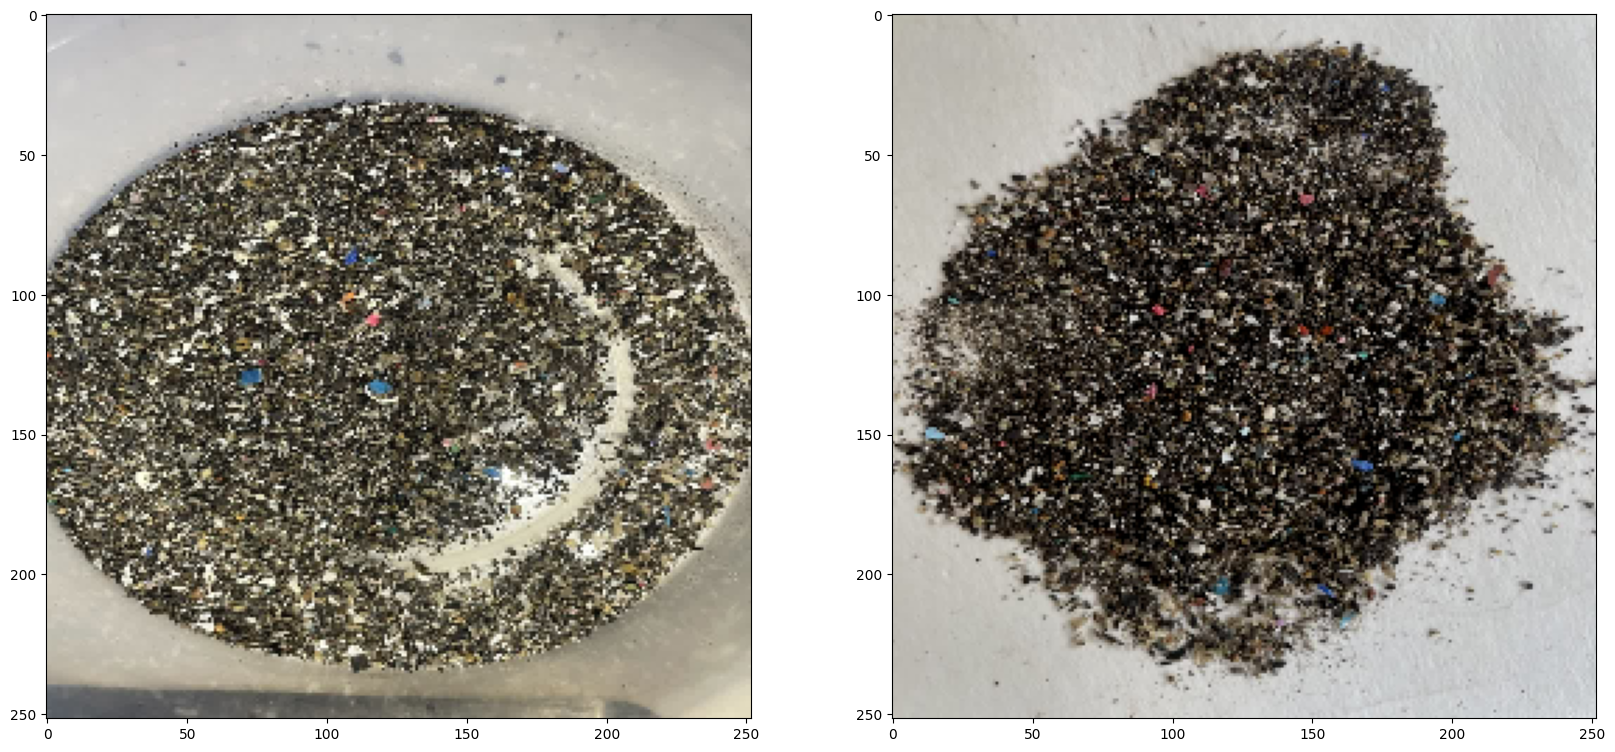

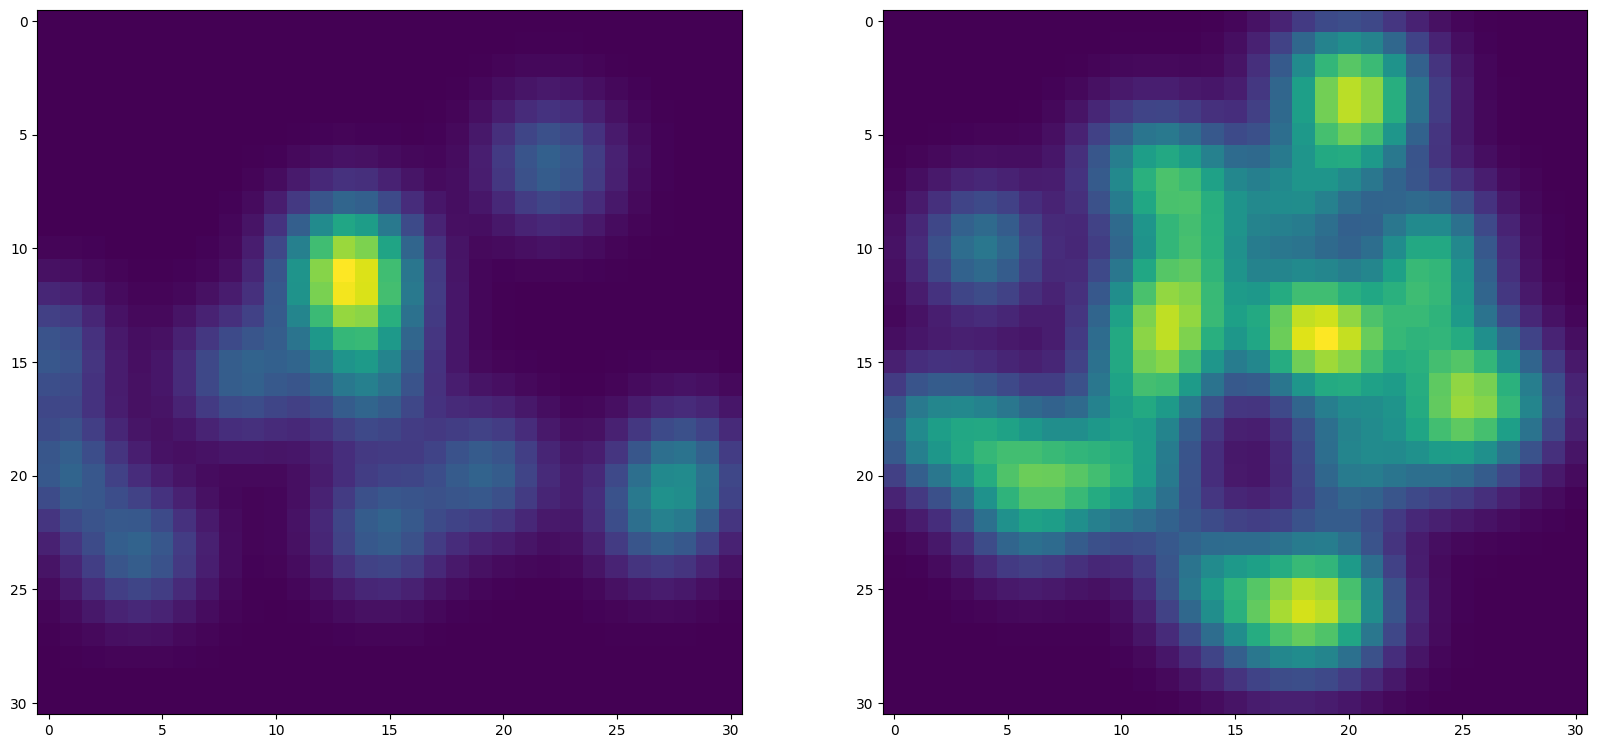

In [25]:
fig_1 , axis1 = plt.subplots(ncols=2, figsize=(20,20))
fig_2 , axis2 = plt.subplots(ncols=2, figsize=(20,20))

for img_batch, dmap_batch in train_ds.take(5):
    for i, (image_, map_) in enumerate(zip(img_batch[:2].numpy(),dmap_batch[:2].numpy())):
        axis1[i].imshow(image_)
        axis2[i].imshow(map_)


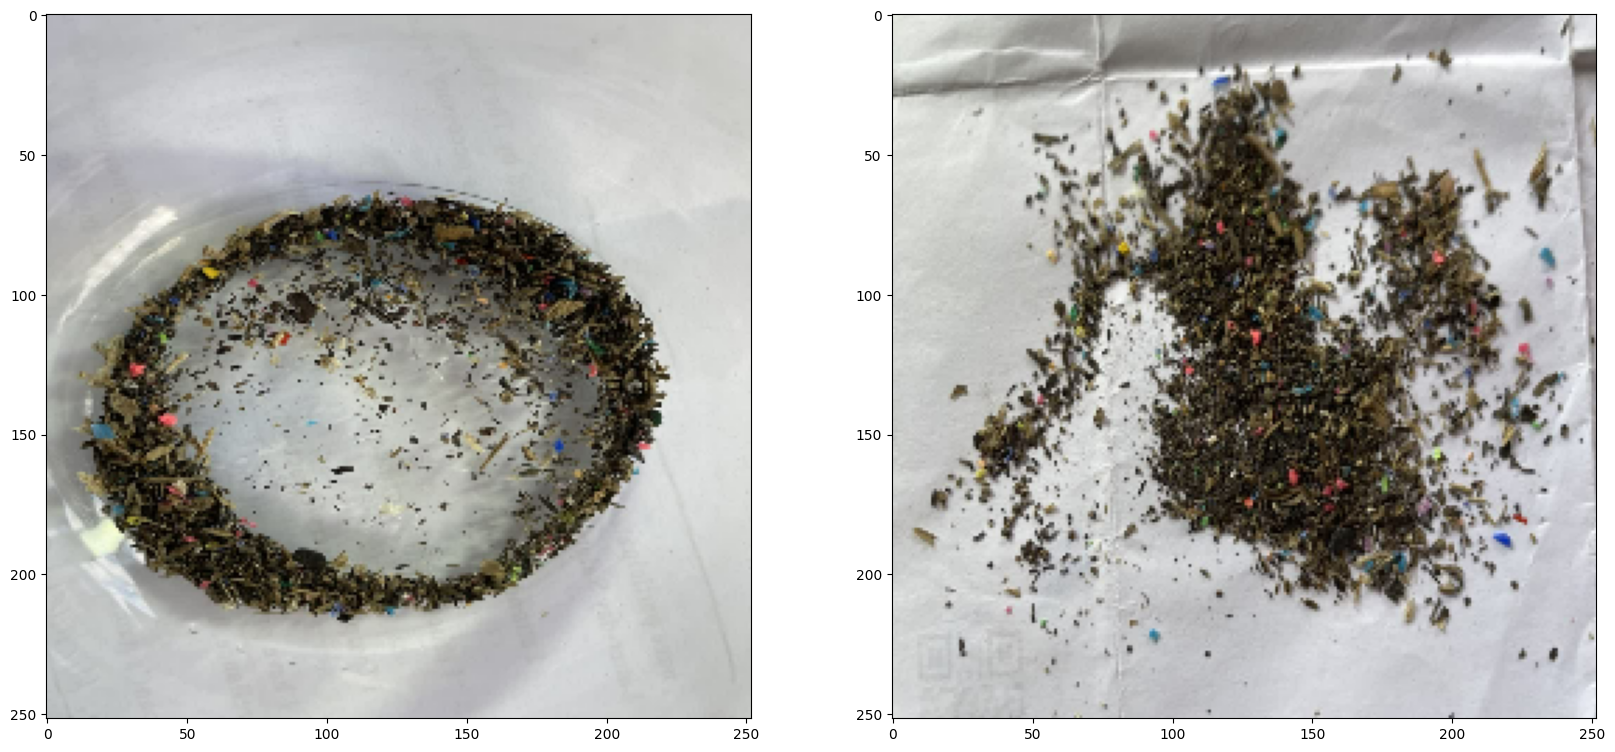

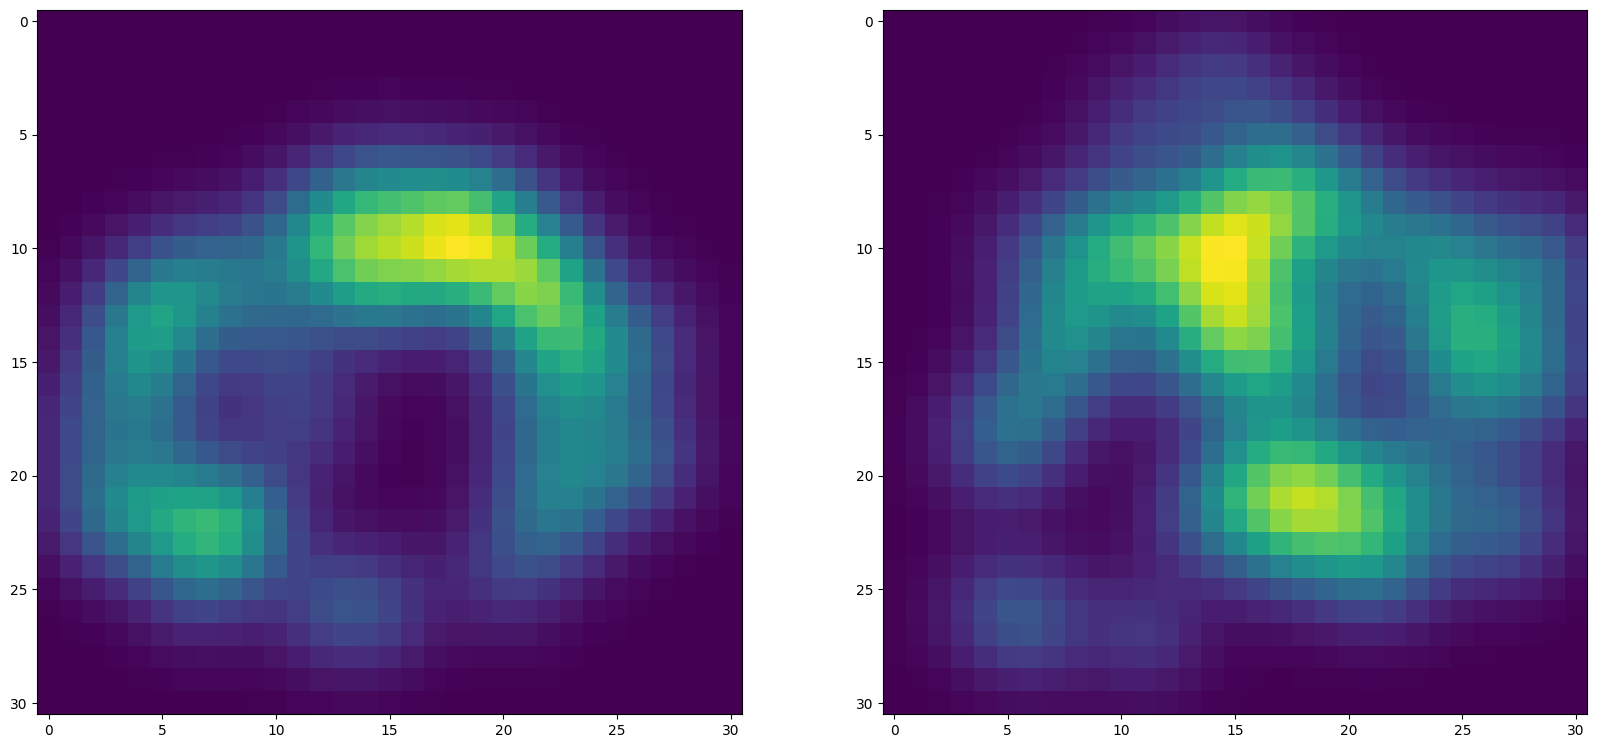

In [26]:
fig_2 , axis2 = plt.subplots(ncols=2, figsize=(20,20))
fig_3 , axis3 = plt.subplots(ncols=2, figsize=(20,20))   

for img_batch, dmap_batch in valid_ds.take(2):
    for i, (image_, map_) in enumerate(zip(img_batch[:2],dmap_batch[:2])):
        axis2[i].imshow(image_)
        axis3[i].imshow(map_)


# Building CSRNET

## Front end

In [27]:
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop

In [28]:
def front_end(inp_shape=(252, 252, 3)):
    input_ = layers.Input(shape=inp_shape)

    # configure vgg16 for csrnet
    vgg_model = VGG16(include_top=False,
                weights="imagenet",
                input_tensor=input_)
    
    # freeze early layers then unfreeze after 
    for layer in vgg_model.layers:
        if 'block4' in layer.name:
            layer.trainable = True
        else:
            layer.trainable = False
    
    # stop in the layer of block4_conv3 
    frontend_output = vgg_model.get_layer("block4_conv3").output

    # create model    
    frontend_model = Model(inputs=input_, outputs=frontend_output, name="CSRNet_Frontend")

    return frontend_model, frontend_output    

In [29]:
frontendModel, frontendOutput = front_end()
frontendModel.summary()   

Model: "CSRNet_Frontend"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 252, 252, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 252, 252, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 252, 252, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 126, 126, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 126, 126, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 63, 63, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,635,264 (29.13 MB)

 Trainable params: 5,899,776 (22.51 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [30]:
def back_end(inp_shape=(252, 252, 3)):

    frontend_model, frontend_output = front_end(inp_shape)

    x = frontend_output
    
    # Backend (dilated conv layers)
    x = layers.Conv2D(512,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(512,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(512,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(256,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(128,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(64,(3,3), dilation_rate=2, padding='same', activation='relu')(x)
    
    # Output density map
    density_map_output = layers.Conv2D(1, 1, padding='same', activation='relu')(x)

    csrnet_model = Model(inputs=frontend_model.input, outputs=density_map_output, name="CSRNet_Backend")

    return csrnet_model

In [31]:
backEnd = back_end()
backEnd.summary()

Model: "CSRNet_Backend"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 252, 252, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 252, 252, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 252, 252, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 126, 126, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 126, 126, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 63, 63, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 63, 63, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 31, 31, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 31, 31, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 31, 31, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 31, 31, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 31, 31, 1)           │              65 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 16,263,489 (62.04 MB)

 Trainable params: 14,528,001 (55.42 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [32]:
for layer in backEnd.layers:
    print(f"{layer.name}: trainable={layer.trainable}")

for i in train_map_ds:
    print("Target density map stats:", i.numpy().min(), i.numpy().mean(), i.numpy().max())

input_layer_1: trainable=False
block1_conv1: trainable=False
block1_conv2: trainable=False
block1_pool: trainable=False
block2_conv1: trainable=False
block2_conv2: trainable=False
block2_pool: trainable=False
block3_conv1: trainable=False
block3_conv2: trainable=False
block3_conv3: trainable=False
block3_pool: trainable=False
block4_conv1: trainable=True
block4_conv2: trainable=True
block4_conv3: trainable=True
conv2d: trainable=True
conv2d_1: trainable=True
conv2d_2: trainable=True
conv2d_3: trainable=True
conv2d_4: trainable=True
conv2d_5: trainable=True
conv2d_6: trainable=True
Target density map stats: 0.0 0.023139037 0.1566332
Target density map stats: 0.0 0.01905536 0.11554046
Target density map stats: 1.0385497e-08 0.03404793 0.13995774
Target density map stats: 0.0 0.03268119 0.19280618
Target density map stats: 0.0 0.01975604 0.11170201
Target density map stats: 0.0 0.018581541 0.119549096
Target density map stats: 0.0 0.018704286 0.14907435
Target density map stats: 0.0 0.027

In [33]:
train_ds = train_ds.shuffle(300)
from tensorflow.keras.optimizers import Adam
backEnd.compile(
    optimizer=Adam(1e-6, clipnorm=1.0) , 
    loss="mse", # standard loss
    metrics=['mae'] # useful for count difference
)

In [34]:
# for logging trainning of training and validation 
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir="logs", # save logs
)

In [35]:
for img, dmap in train_ds.take(5):  # take first 5 samples
    print("Image shape:", img.shape, "Density map shape:", dmap.shape)

for img, dmap in valid_ds.take(5):  # take first 5 samples
    print("Image shape valid:", img.shape, "Density map shape valid:", dmap.shape)

Image shape: (2, 252, 252, 3) Density map shape: (2, 31, 31, 1)
Image shape: (2, 252, 252, 3) Density map shape: (2, 31, 31, 1)
Image shape: (2, 252, 252, 3) Density map shape: (2, 31, 31, 1)
Image shape: (2, 252, 252, 3) Density map shape: (2, 31, 31, 1)
Image shape: (2, 252, 252, 3) Density map shape: (2, 31, 31, 1)
Image shape valid: (2, 252, 252, 3) Density map shape valid: (2, 31, 31, 1)
Image shape valid: (2, 252, 252, 3) Density map shape valid: (2, 31, 31, 1)
Image shape valid: (2, 252, 252, 3) Density map shape valid: (2, 31, 31, 1)
Image shape valid: (2, 252, 252, 3) Density map shape valid: (2, 31, 31, 1)
Image shape valid: (2, 252, 252, 3) Density map shape valid: (2, 31, 31, 1)


In [36]:
# callback for saving during training incase of emergency
checkpoint_training_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath="checkpoints/csrnet_epoch_{epoch:02d}.weights.h5",
    save_weights_only=True,
    save_best_only=False,
    save_freq='epoch',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stops if no improvement for 10 epochs
    restore_best_weights=True,
    verbose=1
)

# backEnd.load_weights("checkpoints/csrnet_epoch_15.weights.h5", skip_mismatch=True)

# init the training
history = backEnd.fit(
    train_ds,
    validation_data=valid_ds,
    # initial_epoch=15,
    epochs=30,
    callbacks=[tensorboard_callback, checkpoint_training_cb, early_stopping]

)

Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - loss: 0.0047 - mae: 0.0390
Epoch 1: saving model to checkpoints/csrnet_epoch_01.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 96s 595ms/step - loss: 0.0043 - mae: 0.0373 - val_loss: 0.0055 - val_mae: 0.0446
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - loss: 0.0036 - mae: 0.0347
Epoch 2: saving model to checkpoints/csrnet_epoch_02.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 96s 606ms/step - loss: 0.0034 - mae: 0.0343 - val_loss: 0.0048 - val_mae: 0.0419
Epoch 3/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - loss: 0.0033 - mae: 0.0341
Epoch 3: saving model to checkpoints/csrnet_epoch_03.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 93s 590ms/step - loss: 0.0030 - mae: 0.0324 - val_loss: 0.0042 - val_mae: 0.0400
Epoch 4/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - loss: 0.0027 - mae: 0.0310
Epoch 4: saving model to checkpoints/csrnet_epoch_04.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 94s 592ms/step - loss: 0.0027 - mae: 0.0309 - val_los

In [41]:
import json
with open('history_.json', 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    history_dict = {key: [float(val) for val in values] 
                   for key, values in history.history.items()}
    json.dump(history_dict, f)

0.005497091915458441 0.04455426335334778
0.004804657306522131 0.04187469556927681
0.00420327577739954 0.03999187424778938
0.003947730641812086 0.03905295208096504
0.0037903389893472195 0.0382155179977417
0.0036215081345289946 0.037348706275224686
0.0035801921039819717 0.036742161959409714
0.0034544069785624743 0.03664271906018257
0.003395381849259138 0.03617732971906662
0.0033411828335374594 0.03584263473749161
0.003288333071395755 0.03551753982901573
0.0032953761983662844 0.03507326915860176
0.003216456389054656 0.035139650106430054
0.0032610741909593344 0.03467084467411041
0.0031447643414139748 0.03477255254983902
0.0031327782198786736 0.035247497260570526
0.0030923341400921345 0.03430014103651047
0.003088674508035183 0.03417004272341728
0.0030835370998829603 0.03470581769943237
0.00303245079703629 0.034430861473083496
0.0030066913459450006 0.034698471426963806
0.003008970757946372 0.03367234393954277
0.0030053649097681046 0.033786315470933914
0.003009326756000519 0.03366006165742874

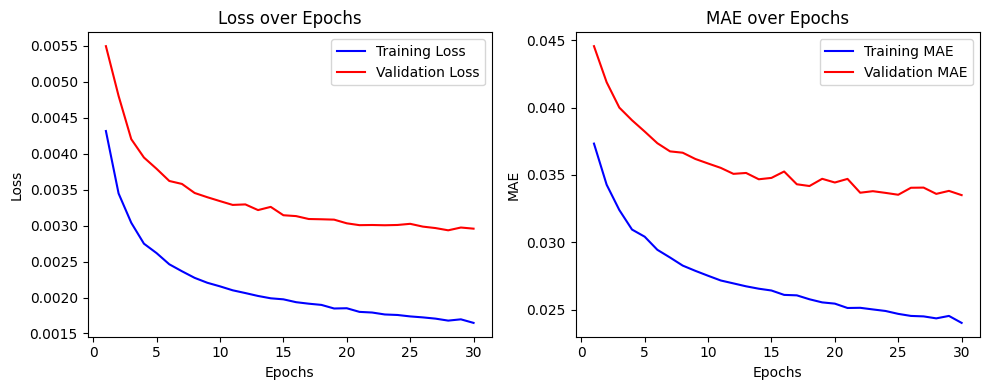

In [43]:

# Extract metrics from history
loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history.get('mae')  # use .get() in case metric not available
val_mae = history.history.get('val_mae')

for i, x in zip(val_loss, val_mae):
    print(i, x)

epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE if available
if mae and val_mae:
    plt.subplot(1,2,2)
    plt.plot(epochs, mae, 'b', label='Training MAE')
    plt.plot(epochs, val_mae, 'r', label='Validation MAE')
    plt.title('MAE over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.tight_layout()
plt.show()


In [44]:
backEnd.save("model/csrnet_full_model.keras")